# Data driven approach

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Import data
experiments = pd.read_csv("/workspaces/MA932-Project/n73_stabilization.csv")
# NOTE: Fixed radius 16.75
experiments = experiments[['TRACK_ID', 'POSITION_X', 'POSITION_Y', 'FRAME']] # Columns of interest

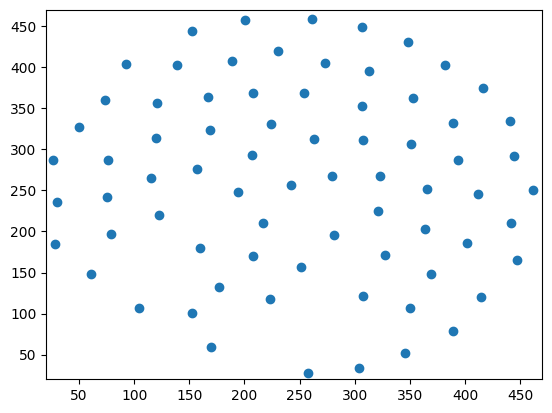

In [3]:
# Create trajectories animation

frames_num = len(pd.unique(experiments['FRAME']))

# Create a figure and axis
fig, ax = plt.subplots()

# Create an empty scatter plot (initially no balls are shown)
scatter = ax.scatter([], [])
ax.set(xlim=[20, 470], ylim=[20, 470])

# Function to update the scatter plot with new ball positions
def update(frame):
    frame_df = experiments[experiments['FRAME'] == frame]
    x = frame_df['POSITION_X']
    y = frame_df['POSITION_Y']

    # update the scatter plot:
    data = np.stack([x, y]).T
    scatter.set_offsets(data)

    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(frames_num), interval=50, blit=True)
#ani.save('animation.gif', writer='pillow')
plt.show()

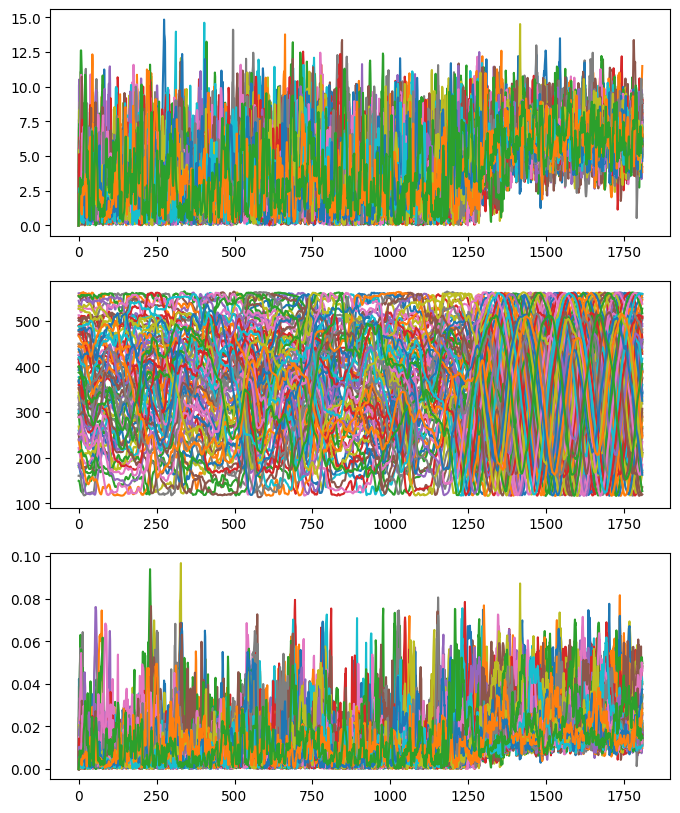

In [43]:
import matplotlib.pyplot as plt

fig, (ax_v, ax_r, ax_angv) = plt.subplots(3, 1, figsize=(8, 10))

for a in pd.unique(experiments['TRACK_ID']):
    if not (a == 73):
        # Calculate v, w and r per agent
        agent = experiments[experiments['TRACK_ID'] == a]

        vel_x = np.zeros(len(agent['FRAME']))
        vel_y = np.zeros(len(agent['FRAME']))
        vel_mag = np.zeros(len(agent['FRAME']))
        ang_vel = np.zeros(len(agent['FRAME']))

        r = np.zeros(len(agent['FRAME']))

        ind_prev = agent[agent['FRAME'] == 0].index
        x_prev = agent.loc[ind_prev, 'POSITION_X'].iloc[0]
        y_prev = agent.loc[ind_prev, 'POSITION_Y'].iloc[0]

        r[0] =  np.sqrt(x_prev**2 + y_prev**2)

        # Assume unit time step per frame
        frames = agent.sort_values(by='FRAME')['FRAME'].values
        for i in frames:
            ind = agent[agent['FRAME'] == i].index
            x = agent.loc[ind, 'POSITION_X'].iloc[0]
            y = agent.loc[ind, 'POSITION_Y'].iloc[0]

            vel_x[i] = x - x_prev
            vel_y[i] = y - y_prev
            vel_mag[i] = np.sqrt(vel_x[i]**2 + vel_y[i]**2)

            r[i] =  np.sqrt(x**2 + y**2)
            ang_vel[i] = vel_mag[i]/r[i]
            
            # Update values
            ind_prev = ind
            x_prev = x
            y_prev = y

        vwr_df = pd.DataFrame({'TRACK_ID': agent['TRACK_ID'], 'FRAME': frames,
                            'VELOCITY_X': vel_x, 'VELOCITY_Y': vel_y, 'VELOCITY_MAG': vel_mag, 
                            'RADIUS': r, 'ANGULAR_VELOCITY': ang_vel})
        
        ax_v.plot(frames, vel_mag)
        ax_r.plot(frames, r)
        ax_angv.plot(frames, ang_vel)

plt.show()

In [ ]:
# Make pretty plots

In [ ]:
# Find the ranges